<a href="https://colab.research.google.com/github/htcysl/Machine-Learning-/blob/main/HaticeUysal_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

Import NumPy and MatPlotLib

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Create synthetic data

In [3]:
np.random.seed(123)

In [4]:
n = 1000
x = 60 * (np.random.rand(n, 1) - 0.5)
y = 60 * (np.random.rand(n, 1) - 0.5)


$x_c$  $\rightarrow$  Center x <br>
$y_c$  $\rightarrow$  Center y <br>
$r$    $\rightarrow$  Radius <br>

In [5]:
x_c = 4
y_c = 8
r = 16

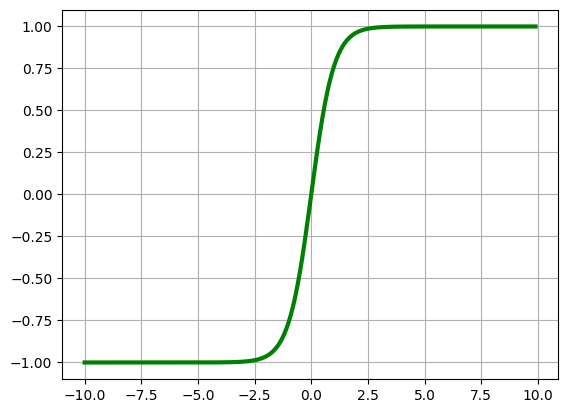

In [6]:
# tanh makes postive values +1 (class-2) and negative values -1 (class-1)
z = np.arange(-10, 10, 0.1)

plt.plot(z, np.tanh(z), c='g', linewidth=3)
plt.grid()
plt.show()

<b>Explain what $d$ holds?</b> <br>

This problem is a binary classification problem and the boundary of these two classes is like a circle with center (x_c,y_c) and radius r. Here the values of d shows which class a point belongs to, if d is positive, the point is out of the circle (class-2), if d is negative, the point inside of circle (class-1).

<b>Explain what $l$ holds?</b> <br>

l represents the hyperbolic tangent function, and according to the definition of this function, it gives all the output values compressed between [-1,1]. In the problem, it brings the d values between [-1,1].   

<b>Explain what $c$ holds?</b> <br>
 c shows numpy round method that round all values to the nearest integer. In the problem the c takes two values -1 and +1, they can be signed as class-1 and class-2 respectively.

In [7]:
def estimateLabels(x, y, x_c, y_c, r):
    d = (x - x_c)**2 + (y - y_c)**2 - r**2

    l = np.tanh(d)
    c = np.round(l)    # Class labels

    return d, l, c

In [8]:
d, l, c = estimateLabels(x, y, x_c, y_c, r)

$x$  $\rightarrow$  First dimension <br>
$y$  $\rightarrow$  Second dimension <br>
$c$  $\rightarrow$  Class labels {-1, 1} <br>

In [9]:
# show first estimated 54 labels
print(c[:54].flatten(), '...')

[ 1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.
 -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.] ...


In [10]:
noiseLevel = 0.5
x += noiseLevel * np.random.randn(n,1)   # First dimension
y += noiseLevel * np.random.randn(n,1)   # Second dimension

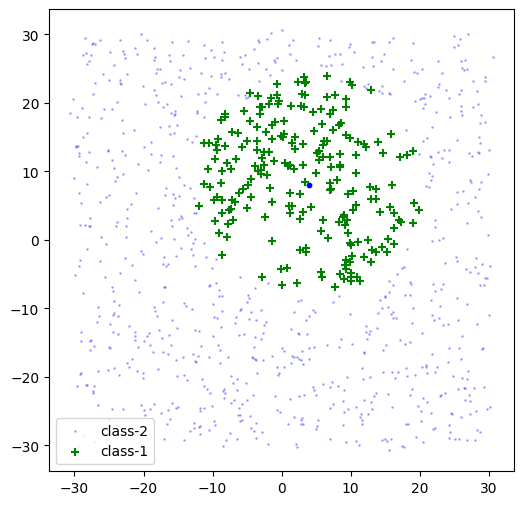

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(x_c, y_c, s=10, c='b')
plt.scatter(x[c==1], y[c==1], s=1, c='b', alpha=0.25, label='class-2')
plt.scatter(x[c==-1], y[c==-1], marker='+', c='g', label='class-1')
plt.legend()
plt.show()

# Calculate estimated parameters: $\hat{x}_{center}$, $\hat{y}_{center}$, and $\hat{r}$

Note that, $d_i$ is positive outside of the circle and negative inside of the circle where $i$ is the index of the $n$ data points  <br>
$d_i = (x_i - x_c)^2 + (y_i -x_c)^2 - r^2$  <br>

$l_i = \text{tanh}(d_i)$  <br>

$E_i = (l_i - c_i)^2$

$E = \frac{1}{n}\sum_{i=1}^{n} E_i$
<hr>

Note that, $\frac{\partial \text{tanh}(z)}{\partial z} = 1 - \text{tanh}^2(z)$

$\frac{\partial E_i}{\partial r} = \frac{\partial E_i}{\partial l_i} \frac{\partial l_i}{\partial d_i} \frac{\partial d_i}{\partial r} = 2(l_i -c_i)(1-\text{tanh}^2(d_i))(-2r) $    (using chain rule) <br>

$\frac{\partial E_i}{\partial l_i} = 2(l_i - c_i)$ <br>

$\frac{\partial l_i}{\partial d_i} = 1 - \text{tanh}^2(d_i)$ <br>

$\frac{\partial d_i}{\partial r} = -2r$ <br>

$\frac{\partial E_i}{\partial d_i} = \frac{\partial E_i}{\partial l_i}\frac{\partial l_i}{\partial d_i} = 2(l_i -c_i)(1-\text{tanh}^2(d_i))$

<hr>

In [12]:
print('Unknown true parameters:')
print('------------------------')
print('x_c = %.2f' % x_c)
print('y_c = %.2f' % y_c)
print('r = %.2f' % r)

Unknown true parameters:
------------------------
x_c = 4.00
y_c = 8.00
r = 16.00


In [13]:
def estimateInitialParameters(x, y, c):

    # x_c_initial and y_c_initial are center of class 1 (c == -1) r_initial is calculated according to this center point.

    x_c_initial = np.mean(x[c == -1])    # student code
    y_c_initial = np.mean(y[c == -1])    # student code
    r_initial =  np.mean(np.sqrt( (x-x_c_initial)**2 + (y-y_c_initial)**2)[c == -1])  # student code

    return x_c_initial, y_c_initial, r_initial

In [14]:
x_c_initial, y_c_initial, r_initial = estimateInitialParameters(x, y, c)

print('Initial estimations:')
print('--------------------')
print('x_c = %.3f' % x_c_initial)
print('y_c = %.3f' % y_c_initial)
print('r = %.3f' % r_initial)

Initial estimations:
--------------------
x_c = 3.180
y_c = 9.142
r = 10.463


In [15]:
d, l, c_estimated = estimateLabels(x, y, x_c_initial, y_c_initial, r_initial)

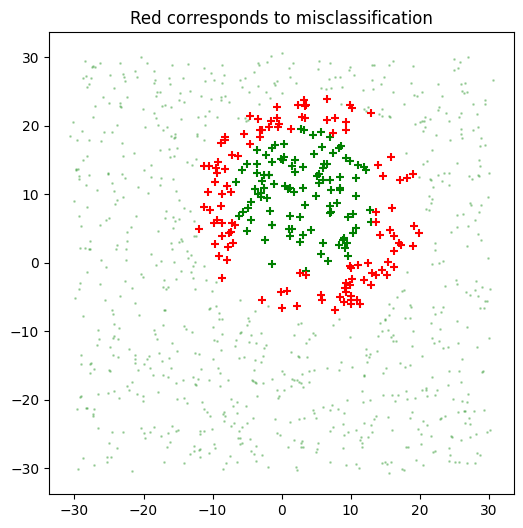

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(x[np.logical_and(c==1, c_estimated==c)], y[np.logical_and(c==1, c_estimated==c)], s=1, c='g', alpha=0.25)
plt.scatter(x[np.logical_and(c==-1, c_estimated==c)], y[np.logical_and(c==-1, c_estimated==c)], marker='+', c='g')
plt.scatter(x[np.logical_and(c==1, c_estimated!=c)], y[np.logical_and(c==1, c_estimated!=c)], s=1, c='r', alpha=0.25)
plt.scatter(x[np.logical_and(c==-1, c_estimated!=c)], y[np.logical_and(c==-1, c_estimated!=c)], marker='+', c='r')
plt.title('Red corresponds to misclassification')
plt.show()

In [17]:
Accuracy = np.sum(c_estimated == c) / n

print('Initial accuracy = ', Accuracy)

Initial accuracy =  0.884


In [18]:
import time

Training for only the <i>radius</i> parameter

See the Youtube videos: <br>
<a href="https://www.youtube.com/watch?v=qg4PchTECck"> Gradient Descent in 3 minutes </a> <br>
<a href="https://www.youtube.com/watch?v=fXQXE96r4AY"> Intro to Gradient Descent </a>

In [19]:
start_time = time.time()

x_c_estimated = x_c_initial
y_c_estimated = y_c_initial
r_estimated = r_initial

errorList = []
accuracyList = []

stepSize = 0.5
convergenceTolerance = 1e-4
maxIteration = 10000
for iteration in range(maxIteration):
    d, l, c_estimated = estimateLabels(x, y, x_c_estimated, y_c_estimated, r_estimated)

    E =  np.sum((c_estimated - c)**2)/n   # student code
    errorList.append(E)

    Accuracy = np.sum(c_estimated == c) / n
    accuracyList.append(Accuracy)

    der_Ei_r = -2 * np.sum((l - c) * (1 - np.tanh(d)**2) * (2*r_estimated)) /n    # student code
    r_estimated -= stepSize * der_Ei_r

    if (abs(der_Ei_r) < convergenceTolerance):
        break

gradientDescent_elapsedTime = (time.time() - start_time)

print("Execution time = %.6f seconds" % gradientDescent_elapsedTime)

Execution time = 0.122745 seconds


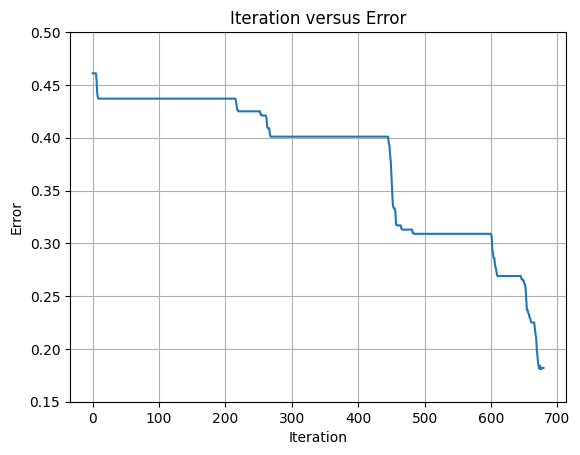

In [20]:
# student code
plt.plot(errorList)
plt.title("Iteration versus Error")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.ylim((0.15,0.5))
plt.grid()
plt.show()

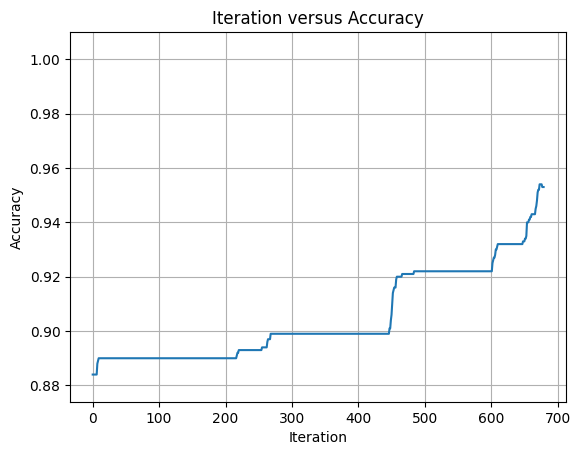

In [21]:
plt.plot(accuracyList)
plt.title('Iteration versus Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.ylim((np.min(accuracyList) - 1e-2, 1.0 + 1e-2))
plt.grid()
plt.show()

In [22]:
print('Unknown true parameters:')
print('------------------------')
print('x_c = %.2f' % x_c)
print('y_c = %.2f' % y_c)
print('r = %.2f' % r)
print()

print('Initial estimations:')
print('--------------------')
print('x_c = %.3f' % x_c_initial)
print('y_c = %.3f' % y_c_initial)
print('r = %.3f' % r_initial)
print()

print('Final estimation:')
print('-----------------')
print('x_c = %.3f   (x_c is not optimized so not changed)' % x_c_initial)
print('y_c = %.3f   (y_c is not optimized so not changed)' % y_c_initial)
print('r = %.3f    (we only optimized the radius)' % r_estimated)

Unknown true parameters:
------------------------
x_c = 4.00
y_c = 8.00
r = 16.00

Initial estimations:
--------------------
x_c = 3.180
y_c = 9.142
r = 10.463

Final estimation:
-----------------
x_c = 3.180   (x_c is not optimized so not changed)
y_c = 9.142   (y_c is not optimized so not changed)
r = 14.302    (we only optimized the radius)


# Show fitting results

In [23]:
d, l, c_estimated = estimateLabels(x, y, x_c_estimated, y_c_estimated, r_estimated)


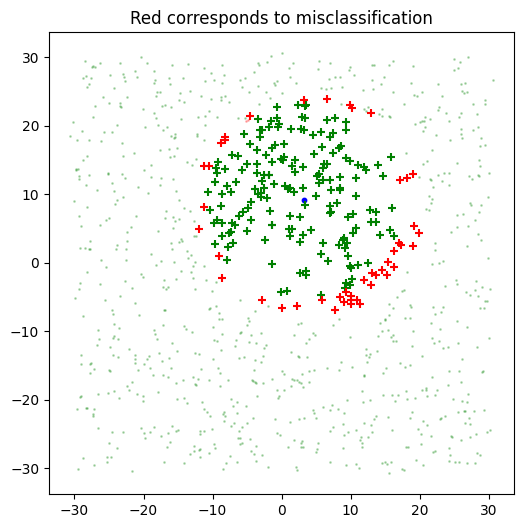

In [24]:
# student code
plt.figure(figsize=(6, 6))
plt.scatter(x_c_estimated, y_c_estimated, s=10, c='b')
plt.scatter(x[np.logical_and(c==1, c_estimated==c)], y[np.logical_and(c==1, c_estimated==c)], s=1, c='g', alpha=0.25)
plt.scatter(x[np.logical_and(c==-1, c_estimated==c)], y[np.logical_and(c==-1, c_estimated==c)], marker='+', c='g')
plt.scatter(x[np.logical_and(c==1, c_estimated!=c)], y[np.logical_and(c==1, c_estimated!=c)], s=1, c='r', alpha=0.25)
plt.scatter(x[np.logical_and(c==-1, c_estimated!=c)], y[np.logical_and(c==-1, c_estimated!=c)], marker='+', c='r')
plt.title('Red corresponds to misclassification')
plt.show()

In [25]:
Accuracy = np.sum(c_estimated == c) / n

print('Final accuracy = ', Accuracy)

Final accuracy =  0.953


<b>Explain the improvements obtained by optimizing the <i>radius</i> parameter</b> <br>

We have 1000 ordered pairs that we randomly generated on the analytical plane, and each ordered pair has a label as a class. On the other hand, the points inside the circular region with predefined center and radius were marked as class 1, and the points outside were marked as class 2.

The center of the point of Class-1 was the center of new circle and initial radius was calculated using these centers and points. Then, optimization was performed using the Gradient Descent method iteratively. In each itaration, the error function was differentiated according to radius and updated with a certain stepsize. The aim is to minimize the value of the error function, that is by trying  to correct misclassfied points by changing radius using Gradient Descent method.

Before optimization the accuracy was 88.4 %, then it increased to 95.3 %.

